In [1]:
import yt
from yt.frontends.gizmo.api import GizmoDataset
from yt import YTArray
from yt import YTQuantity

import numpy as np
import h5py as h5
import os
import matplotlib.pylab as plt
from matplotlib.colors import LogNorm, ListedColormap
import seaborn as sns
import palettable 
sns.set_style("ticks",{'axes.grid': True, 'grid.linestyle': '--'})

import importlib
import yt_helper as yth
import plotting_helper_functions as ph

/Users/irynabutsky/software/yt/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /Users/irynabutsky/.config/yt/ytrc is deprecated in favor of /Users/irynabutsky/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0 . This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [98]:
model_list = ['m12i_mass700_MHDCR_tkFIX', 'cr', 'm11f_mhdcv', 'm11f_cr_700']

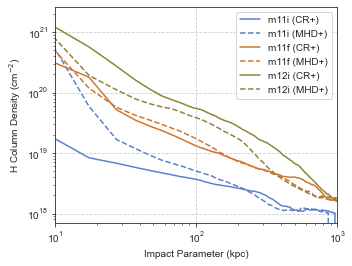

In [407]:
model_list = ['m11i', 'm11f', 'm12i']
#model_list = ['m12i', 'm12m', 'm12f']

palette = sns.color_palette()
palette = [palettable.wesanderson.Mendl_4.mpl_colors[-1], 
           palettable.wesanderson.Margot2_4.mpl_colors[-1],
           palettable.wesanderson.Moonrise1_5.mpl_colors[2]]
    

fig, ax = plt.subplots(figsize=(5, 3.8))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10, 1e3)
ax.set_xlabel('Impact Parameter (kpc)')
ax.set_ylabel('H Column Density (cm$^{-2}$)')
for i, model in enumerate(model_list):
    impact, median = ph.get_radial_H_column(model+'_cr')
    ax.plot(impact, median, label = ph.get_label(model+"_cr"), color = palette[i])
    
    impact, median = ph.get_radial_H_column(model)
    ax.plot(impact, median, label = ph.get_label(model), color = palette[i],  linestyle = 'dashed')
ax.legend()
fig.tight_layout()
plt.savefig('plots/Hcol.png', dpi = 300)

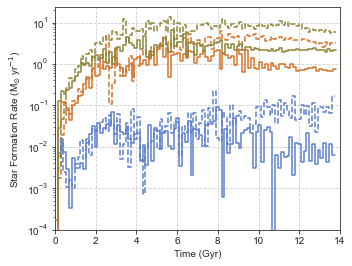

In [287]:
def plot_sfh(model_list, label_list = None):
    fig, ax = plt.subplots(figsize = (5, 3.8))
    if label_list is None:
        label_list = model_list
    palette = [palettable.wesanderson.Darjeeling2_5.mpl_colors[1], 
              palettable.wesanderson.Margot2_4.mpl_colors[-1], 
              palettable.wesanderson.Moonrise1_5.mpl_colors[2], 
              palettable.wesanderson.Moonrise4_5.mpl_colors[-1], 
              palettable.wesanderson.IsleOfDogs2_6.mpl_colors[0]]
    palette = [palettable.wesanderson.Moonrise2_4.mpl_colors[0], 
              palettable.wesanderson.Moonrise2_4.mpl_colors[1], 
              palettable.wesanderson.Moonrise1_5.mpl_colors[2], 
              palettable.wesanderson.Moonrise4_5.mpl_colors[-1], 
              palettable.wesanderson.IsleOfDogs2_6.mpl_colors[0]]
    palette = [palettable.wesanderson.Mendl_4.mpl_colors[-1], 
           palettable.wesanderson.Margot2_4.mpl_colors[-1],
           palettable.wesanderson.Moonrise1_5.mpl_colors[2]]
    #palette = sns.color_palette()
   # palette = sns.color_palette("tab20c")[::4]
    for model, label, color in zip(model_list, label_list, palette):

        time, sfr = ph.get_sfh_data(model+"_cr")
        ax.plot(time, sfr, label = ph.get_label(model+"_cr"), color = color, zorder = 10)
        
        time, sfr = ph.get_sfh_data(model)
        ax.plot(time, sfr, label = ph.get_label(model), color = color, linestyle = 'dashed')
        
        
        
  #  ax.legend()
    ax.set_xlabel('Time (Gyr)')
    ax.set_ylabel('Star Formation Rate (M$_{\odot}$ yr$^{-1}$)')
    ax.set_xlim(0, 14)
    ax.set_yscale('log')
   # ax.set_ylim(0, 7)
    fig.tight_layout()
    plt.savefig('plots/sfr.png', dpi =300)
   
#generate_sfh_data(model_list[0])
model_list = ['m11i', 'm11f', 'm12i']
plot_sfh(model_list)

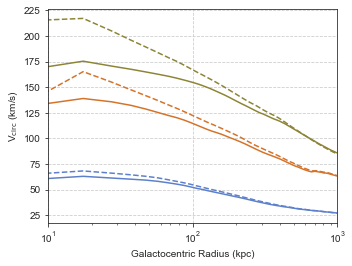

In [288]:
model_list = ['m11i', 'm11f', 'm12i']

palette = sns.color_palette()
palette = [palettable.wesanderson.Mendl_4.mpl_colors[-1], 
           palettable.wesanderson.Margot2_4.mpl_colors[-1],
           palettable.wesanderson.Moonrise1_5.mpl_colors[2]]


fig, ax = plt.subplots(figsize=(5, 3.8))
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(10, 1e3)
ax.set_xlabel('Galactocentric Radius (kpc)')
ax.set_ylabel('V$_{\\rm circ}$ (km/s)')
for i, model in enumerate(model_list):
    impact, vcirc = ph.get_vcirc_profile(model+'_cr')
    ax.plot(impact, vcirc, label = ph.get_label(model+"_cr"), color = palette[i])
    
    impact, vcirc = ph.get_vcirc_profile(model)
    ax.plot(impact, vcirc, label = ph.get_label(model), color = palette[i],  linestyle = 'dashed')
#ax.legend()
fig.tight_layout()
plt.savefig('plots/vcirc.png', dpi = 300)

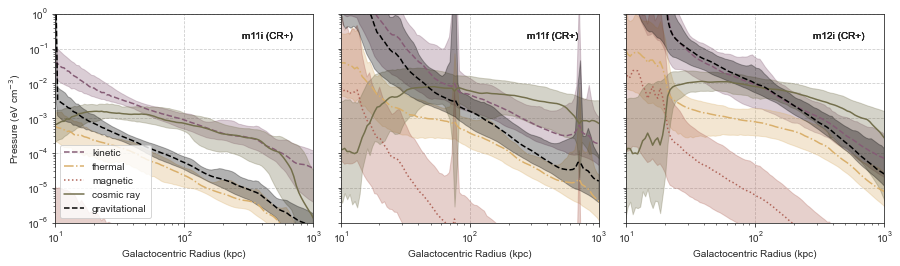

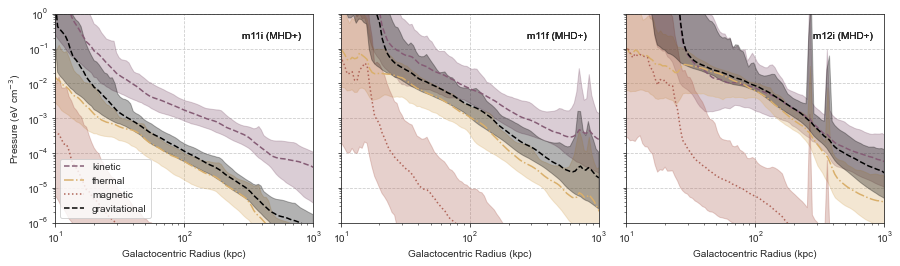

In [169]:
# plotting pressure profiles

importlib.reload(ph)
importlib.reload(yth)

def plot_pressure_profiles(model_type, weight_field = 'density', dens_threshold = None):
    
    pressure_field_list = ['kinetic_energy', 'pressure', 'magnetic_pressure']
    field_label_list = ['kinetic', 'thermal', 'magnetic', 'cosmic ray']
    linestyle_list = ['dashed', 'dashdot', 'dotted', 'solid']
    palette = palettable.cartocolors.qualitative.Antique_10.mpl_colors
    
    if model_type == 'cr':
        pressure_field_list.append('cosmic_ray_pressure')
        model_list = ['m11i_cr', 'm11f_cr', 'm12i_cr']
    else:
        model_list = ['m11i', 'm11f', 'm12i']


    fig, ax = plt.subplots(ncols = len(model_list), figsize = (4.2*len(model_list),3.8), 
                           sharex = True, sharey = True)
    #ax.set_xscale('log')
    ax[0].set_xlim(10, 1000)

    for i, model in enumerate(model_list):
       # data = ph.get_radial_pressure_profile_data(model, field_list = pressure_field_list, weight_field = weight_field)
        data = load_pressure_profiles(model, field_list = pressure_field_list, dens_threshold = dens_threshold)
        r = data['radius']
        for j, field in enumerate(pressure_field_list):
          #  print(model, field, data['%s_median'%field], data['%s_lowlim'%field],  data['%s_uplim'%field])

            ax[i].plot(r, data['%s_median'%field], label = field_label_list[j], linestyle = linestyle_list[j], 
                       color = palette[j])
            ax[i].fill_between(r, data['%s_lowlim'%field][:], data['%s_uplim'%field][:], color = palette[j], alpha = 0.3)
            ax[i].text(2.8e2, 0.2, ph.get_label(model), )

        # add pgrav
        radius, pgrav, lowlim, uplim = get_pgrav(model)
        ax[i].plot(radius, pgrav, color = 'black', linestyle = 'dashed', label = 'gravitational')
        ax[i].fill_between(radius, lowlim, uplim, color = 'black', alpha = 0.3)
        
        if model_type == '':
            radius, crp, lowlim, uplim = get_crp(model)
            ax[i].plot(radius, crp, color = 'blue', linestyle = 'dashed')
            ax[i].fill_between(radius, lowlim, uplim, color = 'blue', alpha = 0.3)
                    
        ax[i].set_yscale('log')
        ax[i].set_xscale('log')
        ax[i].set_xlabel('Galactocentric Radius (kpc)')
        ax[0].set_ylabel('Pressure (eV cm$^{-3}$)')
       # ax[i].set_title(model)
        ax[i].set_ylim(1e-6, 1)

    ax[0].legend(loc = 3)
    fig.tight_layout()
    
    if model_type == 'cr':
        fig_label = 'cr'
    else:
        fig_label = 'mhd'
    if dens_threshold:
        plt.savefig('plots/pressure_profile_rho%e_%s.png'%(dens_threshold, fig_label), dpi = 300)
    else:
        plt.savefig('plots/pressure_profile_%s.png'%(fig_label), dpi = 300)


dens_threshold = None
plot_pressure_profiles('cr', dens_threshold = dens_threshold)
plot_pressure_profiles('mhd', dens_threshold = dens_threshold)


# NOTE check CR profiles for mass weighted and not. concerned the weighting was off inside the code


In [57]:
model = 'm11i_cr'
weight = 'density'
#deleting fields t0 
data = h5.File('data/radial_pressure_profile_data_%s_%s.h5'%(weight, model), 'a')
#data = 'None' # so i don't accidentally run this
print(data.keys())
field_name = 'kin'
for append in ['mean', 'median', 'uplim', 'lowlim']:
    name = '%s_%s'%(field_name, append)
    print(name)
    if name in data.keys():
        print('deleted')
        del data[name]
data.close()    

<KeysViewHDF5 ['cosmic_ray_pressure_lowlim', 'cosmic_ray_pressure_mean', 'cosmic_ray_pressure_median', 'cosmic_ray_pressure_uplim', 'kinetic_energy_lowlim', 'kinetic_energy_mean', 'kinetic_energy_median', 'kinetic_energy_uplim', 'magnetic_pressure_lowlim', 'magnetic_pressure_mean', 'magnetic_pressure_median', 'magnetic_pressure_uplim', 'pressure_lowlim', 'pressure_mean', 'pressure_median', 'pressure_uplim', 'spherical_position_radius']>
pressure_mean
deleted
pressure_median
deleted
pressure_uplim
deleted
pressure_lowlim
deleted


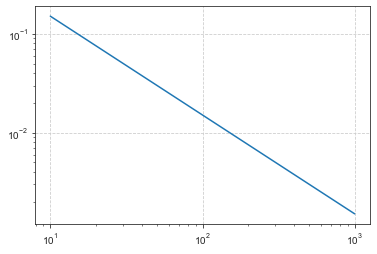

In [462]:
def analytic_Pcr(model, kappa = 1e30, sfr_time_interval = 1e9):
    impact_list = YTArray(np.logspace(1, 3, 100), 'pc')
    sfr = ph.estimate_sfr(model, time_interval = sfr_time_interval)
    #print(sfr)
    kappa = YTQuantity(kappa, 'cm**2/s')
    Ecr_dt = YTQuantity(sfr* 0.1 * 1e49, 'erg/yr')
    
    Pcr = (Ecr_dt.in_units('erg/s') / (12 *np.pi * kappa * impact_list.in_units('cm'))).in_units('eV / cm**3')
    return impact_list, Pcr

impact_list, Pcr = analytic_Pcr('m11i_cr')
plt.loglog(impact_list, Pcr)
    
    

In [465]:
def cr_profile_test(model, impact_list = None, radius = 1000, save = True):

    if impact_list is None:
        impact_list = np.logspace(1,np.log10(radius), 100)

    ds, center = yth.load_ds(model)
    max_r = 1.2 * np.max(impact_list)
    ad = ds.sphere(center, (max_r, 'kpc'))

    r_gas = ad[('gas', 'spherical_position_radius')].in_units('kpc')

    crp_median_list = np.array([])
    crp_mean_list = np.array([])
    lowlim_list = np.array([])
    uplim_list  = np.array([])
    for i, impact in enumerate(impact_list):
        impact = YTQuantity(impact, 'kpc')
        if i == 0:
            g_mask = r_gas < impact
        else:
            g_mask = (r_gas <= impact) & (r_gas > impact_list[i-1])

        crp = ad[('gas', 'cosmic_ray_pressure')][g_mask].in_units('eV/cm**3')
        crp_median_list = np.append(crp_median_list, np.median(crp))
        crp_mean_list = np.append(crp_mean_list, np.mean(crp))
        lowlim, uplim = np.percentile(crp, [5, 95])
        lowlim_list = np.append(lowlim_list, lowlim)
        uplim_list = np.append(uplim_list, uplim)



    return impact_list, crp_median_list, crp_mean_list, lowlim_list, uplim_list

In [466]:
impact, crp_median_list, crp_mean_list, lowlim_list, uplim_list = cr_profile_test('m12i_cr')

yt : [INFO     ] 2022-07-12 16:23:19,005 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2022-07-12 16:23:19,006 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2022-07-12 16:23:19,054 Parameters: current_time              = 4.3545571088051405e+17 s
yt : [INFO     ] 2022-07-12 16:23:19,055 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-07-12 16:23:19,056 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-12 16:23:19,057 Parameters: domain_right_edge         = [60000. 60000. 60000.]
yt : [INFO     ] 2022-07-12 16:23:19,058 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-07-12 16:23:19,058 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2022-07-12 16:23:19,059 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2022-07-12 16:23:19,059 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2022-07-12 16:23:19,060 Parameters: omega_radiation           = 0.

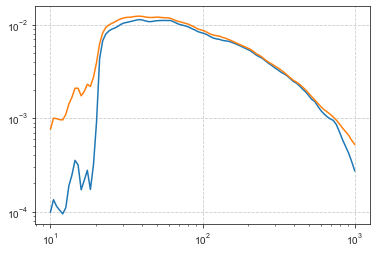

In [468]:
impact = np.logspace(1, 3, 100)
plt.loglog(impact, crp_median_list)
plt.loglog(impact, crp_mean_list)

In [159]:
def load_pressure_profiles(model, field_list, dens_threshold = None):
    if dens_threshold is not None:
        fname = 'data/pressure_profiles_rho%e_%s.h5'%(dens_threshold, model)
    else:
        fname = 'data/pressure_profiles_%s.h5'%model
        
    if not os.path.isfile(fname):
        generate_pressure_profiles(model, dens_threshold = dens_threshold)
        
    data = h5.File(fname, 'r') 
    
    
    stored_data_file = h5.File(fname, 'r')

    data_to_output = {}#dict.fromkeys(field_list, np.array([]))                                                                                                         
    field_list = np.array(field_list) # needs to be numpy array                                                                                                         

    # now we should have all the data and can just load it in                                                                                                           
    data_to_output['radius'] = np.array(stored_data_file.get('radius'))
    for field in field_list:
        for data_type in ['mean', 'median', 'lowlim', 'uplim']:
            field_entry = '%s_%s'%(field, data_type)
            # copying into dictionary so that we can close h5 file... idk if that's realy necessary                                                                     
            data_to_output[field_entry] = np.array(stored_data_file.get(field_entry))
    stored_data_file.close()
    return data_to_output

def generate_pressure_profiles(model, field_list = None, impact_list = None, dens_threshold = None, 
                               save = True, overwrite = False):
    
    if dens_threshold is not None:
        fname = 'data/pressure_profiles_rho%e_%s.h5'%(dens_threshold, model)
    else:
        fname = 'data/pressure_profiles_%s.h5'%model    
        
    if os.path.isfile(fname) and overwrite == False:
        return
    
    h5file = h5.File(fname, 'w')

    if field_list is None:
        field_list = np.array(['kinetic_energy', 'pressure', 'magnetic_pressure'])
        if model.__contains__('cr'):
            field_list = np.append(field_list, 'cosmic_ray_pressure')
    if impact_list is None:
        impact_list = np.logspace(0.8,3.1, 120)
    h5file.create_dataset('radius', data = impact_list)


    ds, center = yth.load_ds(model)
    max_r = 1.2 * np.max(impact_list)
    ad = ds.sphere(center, (max_r, 'kpc'))

    r_gas = ad[('gas', 'spherical_position_radius')].in_units('kpc') 
    rho = ad[('gas', 'density')].in_units('g/cm**3')
    
 
    
    for field in field_list:
        med_list = np.array([])
        mean_list = np.array([])
        lowlim_list = np.array([])
        uplim_list  = np.array([])
        for i, impact in enumerate(impact_list):
            impact = YTQuantity(impact, 'kpc')
            if i == 0:
                g_mask = (r_gas < impact) 
            else:
                g_mask = (r_gas <= impact) & (r_gas > impact_list[i-1])
                
            if dens_threshold is not None:
                g_mask = g_mask & (rho < dens_threshold)
                
            p = ad[('gas', field)].in_units('eV / cm**3')
            med_list = np.append(med_list, np.median(p[g_mask]))
            mean_list = np.append(mean_list, np.mean(p[g_mask]))
            lowlim, uplim = np.percentile(p[g_mask], [5, 95])
            lowlim_list = np.append(lowlim_list, lowlim)
            uplim_list = np.append(uplim_list, uplim)


        h5file.create_dataset('%s_median'%field, data = med_list)
        h5file.create_dataset('%s_mean'%field, data = mean_list)
        h5file.create_dataset('%s_lowlim'%field, data = lowlim_list)
        h5file.create_dataset('%s_uplim'%field, data = uplim_list)
            
    h5file.close()

yt : [INFO     ] 2022-07-13 13:18:20,482 Calculating time from 1.000e+00 to be 4.335e+17 seconds
yt : [INFO     ] 2022-07-13 13:18:20,483 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2022-07-13 13:18:20,529 Parameters: current_time              = 4.3348239819160384e+17 s
yt : [INFO     ] 2022-07-13 13:18:20,530 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-07-13 13:18:20,531 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-13 13:18:20,532 Parameters: domain_right_edge         = [58480. 58480. 58480.]
yt : [INFO     ] 2022-07-13 13:18:20,532 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-07-13 13:18:20,533 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2022-07-13 13:18:20,534 Parameters: omega_lambda              = 0.69
yt : [INFO     ] 2022-07-13 13:18:20,534 Parameters: omega_matter              = 0.31
yt : [INFO     ] 2022-07-13 13:18:20,535 Parameters: omega_radiatio

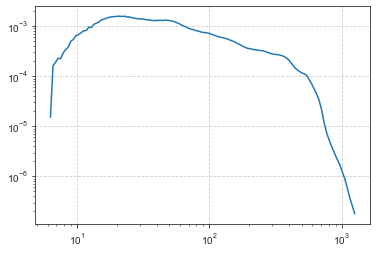

In [153]:
model = 'm12i_cr'
fname =  'data/pressure_profiles_%s.h5'%model 
data.close()
generate_pressure_profiles(model, overwrite = True)

data = h5.File(fname, 'r') 
list(data.keys())

x = data['radius'][:]
y= data['cosmic_ray_pressure_median'][:]
#y = data.get('cosmic_ray_pressure_median')

plt.loglog(x, y)

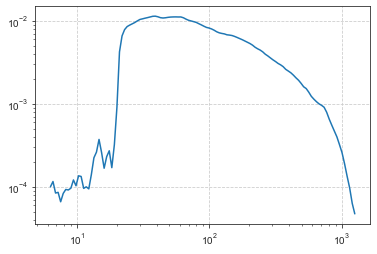

In [167]:
model = 'm12i_cr'
fname =  'data/pressure_profiles_%s.h5'%model 
#data.close()
#generate_pressure_profiles(model, overwrite = True)

data = h5.File(fname, 'r') 
list(data.keys())

x = data['radius'][:]
y= data['cosmic_ray_pressure_median'][:]
#y = data.get('cosmic_ray_pressure_median')

plt.loglog(x, y)

In [160]:
field_list = ['kinetic_energy', 'pressure', 'magnetic_pressure']
data = load_pressure_profiles('m11i_cr', field_list = field_list)

data['radius']

array([   6.30957344,    6.59671515,    6.89692435,    7.21079574,
          7.53895107,    7.88204038,    8.24074331,    8.61577041,
          9.00786458,    9.41780253,    9.84639629,   10.29449488,
         10.76298594,   11.25279752,   11.76489987,   12.30030744,
         12.86008081,   13.44532884,   14.05721087,   14.69693897,
         15.36578039,   16.06506004,   16.79616313,   17.56053792,
         18.35969855,   19.1952281 ,   20.06878168,   20.98208971,
         21.93696138,   22.9352882 ,   23.97904776,   25.07030768,
         26.21122962,   27.40407365,   28.6512027 ,   29.9550872 ,
         31.31831005,   32.74357166,   34.23369535,   35.79163292,
         37.4204705 ,   39.12343467,   40.90389886,   42.76539   ,
         44.71159555,   46.74637075,   48.87374632,   51.09793639,
         53.42334689,   55.85458425,   58.39646453,   61.05402297,
         63.83252394,   66.73747142,   69.77461985,   72.94998553,
         76.26985859,   79.7408154 ,   83.36973161,   87.16379

In [ ]:
def get_pgrav(model, impact_list = None, radius = 1000, save = True):
    # V_c = sqrt(GM(<r) /r)                                                                                                                         
    fname = 'data/Pgrav_profile_%s.h5'%model
    if os.path.isfile(fname):
        h5file = h5.File(fname, 'r')
        impact = h5file['radius'][:]
        Pgrav_list = h5file['Pgrav'][:]
       # Pgrav2_list = h5file['Pgrav2'][:]

        lowlim_list = h5file['lowlim'][:]
        uplim_list = h5file['uplim'][:]
    else:
        if impact_list is None:
            impact_list = np.logspace(1,np.log10(radius), 100)

        ds, center = yth.load_ds(model)
        max_r = 1.2 * np.max(impact_list)
        ad = ds.sphere(center, (max_r, 'kpc'))

        G = YTQuantity(6.6743e-11, 'm**3 / kg / s**2')
        r_gas = ad[('gas', 'spherical_position_radius')].in_units('kpc')
        r_star = ad[('PartType4', 'particle_position_spherical_radius')].in_units('kpc')
        r_dark = ad[('PartType1', 'particle_position_spherical_radius')].in_units('kpc')
        r_dark2 = ad[('PartType2', 'particle_position_spherical_radius')].in_units('kpc')
        m_gas = ad[('gas', 'mass')].in_units('g')                                                                                          
        m_star = ad[('PartType4', 'particle_mass')].in_units('g')                                                                           
        m_dark = ad[('PartType1', 'particle_mass')].in_units('g')
        m_dark2 = ad[('PartType2', 'particle_mass')].in_units('g')

        Pgrav_list  = np.array([])
      #  Pgrav2_list  = np.array([])

        lowlim_list = np.array([])
        uplim_list  = np.array([])
        for i, impact in enumerate(impact_list):
            impact = YTQuantity(impact, 'kpc')
            m_enc = np.sum(m_gas[r_gas <= impact].in_units('g')) + np.sum(m_star[r_star <= impact].in_units('g')) \
                + np.sum(m_dark[r_dark <= impact].in_units('g')) + np.sum(m_dark2[r_dark2 <= impact].in_units('g'))
            #print(m_enc)
            if i == 0:
                g_mask = r_gas < impact
                s_mask = r_star < impact
                d_mask = r_dark < impact
                vol = YTQuantity(4./3. * np.pi * np.power(impact, 3), 'kpc**3')

            else:
                g_mask = (r_gas <= impact) & (r_gas > impact_list[i-1])
                s_mask = (r_star <= impact) & (r_star > impact_list[i-1])
                d_mask = (r_dark <= impact) & (r_dark > impact_list[i-1])
                vol = YTQuantity(4./3. * np.pi * ((np.power(impact_list[i], 3) - np.power(impact_list[i-1], 3))), 'kpc**3')
                
            rho = ad[('gas', 'density')].in_units('g/cm**3')
           # rho = m_gas / vol
          #  m_additional = np.sum(m_star[s_mask].in_units('g')) + np.sum(m_dark[d_mask].in_units('g'))
          #  rho += (m_additional / vol).in_units('g/cm**3')
                      
            #PG = (rho*G*m_enc / (2 * impact)).in_units('eV / cm**3')
            PG = (rho[g_mask]*G*m_enc / (2 * impact)).in_units('eV / cm**3')
            Pgrav_list = np.append(Pgrav_list, np.mean(PG))
            lowlim, uplim = np.percentile(PG, [5, 95])
            lowlim_list = np.append(lowlim_list, lowlim)
            uplim_list = np.append(uplim_list, uplim)


        if save:
            h5file = h5.File(fname, 'w')
            h5file.create_dataset('radius', data = impact_list)
            h5file.create_dataset('Pgrav', data = Pgrav_list)
            h5file.create_dataset('lowlim', data = lowlim_list)
            h5file.create_dataset('uplim', data = uplim_list)


    return impact_list, Pgrav_list, lowlim_list, uplim_list

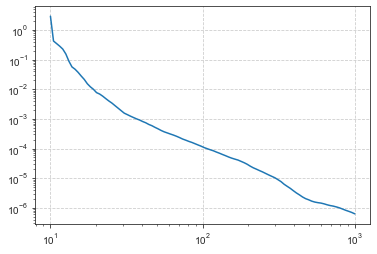

In [406]:

model_list = ['m11i']#, 'm11f', 'm12i']
for model in model_list:
    impact, pgrav, lowlim, uplim = get_pgrav(model)
   # impact, pgrav, lowlim, uplim = get_pgrav(model+"_cr")
    plt.loglog(impact, pgrav, label = model)
   # print(impact, pgrav)
    #plt.fill_between(impact, lowlim, uplim, alpha = 0.3)


In [442]:
ds, center = yth.load_ds('m11i_cr')
ad = ds.sphere(center, (50, 'kpc'))


yt : [INFO     ] 2022-07-12 15:12:23,336 Calculating time from 1.000e+00 to be 4.335e+17 seconds
yt : [INFO     ] 2022-07-12 15:12:23,337 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2022-07-12 15:12:23,384 Parameters: current_time              = 4.3348239819160384e+17 s
yt : [INFO     ] 2022-07-12 15:12:23,384 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-07-12 15:12:23,385 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-12 15:12:23,386 Parameters: domain_right_edge         = [58480. 58480. 58480.]
yt : [INFO     ] 2022-07-12 15:12:23,386 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-07-12 15:12:23,387 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2022-07-12 15:12:23,387 Parameters: omega_lambda              = 0.69
yt : [INFO     ] 2022-07-12 15:12:23,388 Parameters: omega_matter              = 0.31
yt : [INFO     ] 2022-07-12 15:12:23,389 Parameters: omega_radiatio

In [446]:
np.median(ad[('gas', 'density')])

unyt_quantity(1.26821221e-28, 'g/cm**3')

In [444]:
r = YTQuantity(50, 'kpc')
vol = 4./3. * np.pi * np.power(r, 3)
print(np.sum(ad[('gas','mass')].in_units('g')) / vol.in_units('cm**3'))


5.874047065420762e-29 g/cm**3


In [320]:
ds.derived_field_list

[('PartType0', 'C_metallicity'),
 ('PartType0', 'C_nuclei_density'),
 ('PartType0', 'C_nuclei_mass_density'),
 ('PartType0', 'Ca_metallicity'),
 ('PartType0', 'Ca_nuclei_density'),
 ('PartType0', 'Ca_nuclei_mass_density'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'CosmicRayEnergy'),
 ('PartType0', 'Density'),
 ('PartType0', 'DivBcleaningFunctionGradPhi'),
 ('PartType0', 'DivBcleaningFunctionPhi'),
 ('PartType0', 'DivergenceOfMagneticField'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'Fe_metallicity'),
 ('PartType0', 'Fe_nuclei_density'),
 ('PartType0', 'Fe_nuclei_mass_density'),
 ('PartType0', 'H_nuclei_density'),
 ('PartType0', 'H_p0_density'),
 ('PartType0', 'H_p0_fraction'),
 ('PartType0', 'H_p0_mass'),
 ('PartType0', 'H_p0_number_density'),
 ('PartType0', 'H_p1_density'),
 ('PartType0', 'H_p1_fraction'),
 ('PartType0', 'H_p1_mass'),
 ('PartType0', 'H_p1_number_density'),
 ('PartType0', 'He_metallicity'),
 ('PartType0', 'He_nuclei_density'),
 ('PartType0', 'He_nuclei_

[0.41456037 0.39571796 0.37773197 0.36056347 0.3441753  0.328532
 0.31359972 0.29934613 0.28574038 0.27275304 0.26035599 0.24852241
 0.23722669 0.22644437 0.21615212 0.20632767 0.19694976 0.18799809
 0.17945329 0.17129686 0.16351115 0.15607932 0.14898527 0.14221366
 0.13574983 0.12957979 0.12369019 0.11806828 0.11270189 0.10757942
 0.10268977 0.09802236 0.09356709 0.08931432 0.08525485 0.08137989
 0.07768104 0.07415032 0.07078007 0.06756301 0.06449217 0.0615609
 0.05876286 0.056092   0.05354253 0.05110894 0.04878596 0.04656856
 0.04445195 0.04243154 0.04050296 0.03866204 0.03690479 0.03522741
 0.03362627 0.0320979  0.030639   0.02924641 0.02791712 0.02664824
 0.02543704 0.02428089 0.02317728 0.02212384 0.02111828 0.02015842
 0.01924219 0.0183676  0.01753276 0.01673587 0.0159752  0.0152491
 0.01455601 0.01389442 0.01326289 0.01266007 0.01208465 0.01153539
 0.01101109 0.01051062 0.01003289 0.00957688 0.0091416  0.0087261
 0.00832948 0.0079509  0.00758952 0.00724456 0.00691528 0.00660097


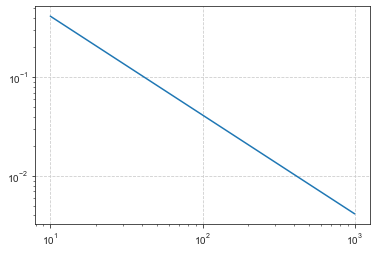

In [310]:
# calculating P_cr analytic profile
model = 'm12i_cr'
esn = YTQuantity(1e49, 'erg/Msun') # 10^51 erg / 100 Msun
sfr_mean = YTQuantity(ph.estimate_sfr(model), 'Msun/yr') # units of Msun / yr
edot_cr = 0.1 * esn * sfr_mean

r = YTArray(np.logspace(1, 3, 100), 'kpc')
kappa_eff = YTQuantity(1e29, 'cm**2/s')

P_cr = (edot_cr / (12 * np.pi * kappa_eff * r)).in_units('eV / cm**3')
print(P_cr)
plt.loglog(r, P_cr)


In [294]:
#deleting fields t0 
data = h5.File('data/radial_pressure_profile_data_volume_m11f_cr.h5', 'a')
#data = 'None' # so i don't accidentally run this
print(data.keys())
field_name = 'magnetic_pressure'
for append in ['mean', 'median', 'uplim', 'lowlim']:
    name = '%s_%s'%(field_name, append)
    print(name)
    if name in data.keys():
        print('deleted')
        del data[name]
data.close()    

<KeysViewHDF5 ['cosmic_ray_pressure_lowlim', 'cosmic_ray_pressure_mean', 'cosmic_ray_pressure_median', 'cosmic_ray_pressure_uplim', 'kinetic_energy_lowlim', 'kinetic_energy_mean', 'kinetic_energy_median', 'kinetic_energy_uplim', 'magnetic_pressure_lowlim', 'magnetic_pressure_mean', 'magnetic_pressure_median', 'magnetic_pressure_uplim', 'pressure_lowlim', 'pressure_mean', 'pressure_median', 'pressure_uplim', 'spherical_position_radius']>
kinetic_energy_mean
deleted
kinetic_energy_median
deleted
kinetic_energy_uplim
deleted
kinetic_energy_lowlim
deleted


In [8]:
importlib.reload(yth)

ds, center = yth.load_ds(model_list[0])

yt : [INFO     ] 2022-06-22 15:14:39,086 Calculating time from 1.000e+00 to be 4.355e+17 seconds
yt : [INFO     ] 2022-06-22 15:14:39,088 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2022-06-22 15:14:39,146 Parameters: current_time              = 4.3545571088051405e+17 s
yt : [INFO     ] 2022-06-22 15:14:39,147 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-06-22 15:14:39,147 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-22 15:14:39,148 Parameters: domain_right_edge         = [60000. 60000. 60000.]
yt : [INFO     ] 2022-06-22 15:14:39,149 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-06-22 15:14:39,149 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2022-06-22 15:14:39,149 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2022-06-22 15:14:39,150 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2022-06-22 15:14:39,151 Parameters: omega_radiation           = 0.

In [20]:
#pb= sp[('gas','magnetic_pressure')]
ydata = np.log10(pb.in_units('eV/cm**3'))
xdata = np.log10(sp[('gas', 'spherical_position_radius')].in_units('kpc'))
zdata = sp[('gas', 'ones')]

                    
                    
                 

/Users/irynabutsky/software/miniconda3/lib/python3.8/site-packages/unyt/array.py:1674: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


In [154]:
ds.derived_field_list

[('PartType0', 'C_metallicity'),
 ('PartType0', 'C_nuclei_density'),
 ('PartType0', 'C_nuclei_mass_density'),
 ('PartType0', 'Ca_metallicity'),
 ('PartType0', 'Ca_nuclei_density'),
 ('PartType0', 'Ca_nuclei_mass_density'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'Density'),
 ('PartType0', 'DivBcleaningFunctionGradPhi'),
 ('PartType0', 'DivBcleaningFunctionPhi'),
 ('PartType0', 'DivergenceOfMagneticField'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'Fe_metallicity'),
 ('PartType0', 'Fe_nuclei_density'),
 ('PartType0', 'Fe_nuclei_mass_density'),
 ('PartType0', 'H_nuclei_density'),
 ('PartType0', 'H_p0_density'),
 ('PartType0', 'H_p0_fraction'),
 ('PartType0', 'H_p0_mass'),
 ('PartType0', 'H_p0_number_density'),
 ('PartType0', 'H_p1_density'),
 ('PartType0', 'H_p1_fraction'),
 ('PartType0', 'H_p1_mass'),
 ('PartType0', 'H_p1_number_density'),
 ('PartType0', 'He_metallicity'),
 ('PartType0', 'He_nuclei_density'),
 ('PartType0', 'He_nuclei_mass_density'),
 ('PartType0', 'Int